Drugs and Narcotics: San Francisco versus Seatle study
========================

Crimes. What a huge problem in cities.

We always to to be the most efficient as we can to prevent crimes and to stop criminals.


__Our study is focus on the two cities of San Francisco, US and Seatle, US.__

*We focus on the summer 2014.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from ggplot import *
from datetime import datetime
%matplotlib inline

In [239]:
sf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
seatle = pd.read_csv('seattle_incidents_summer_2014.csv')
seatle = seatle[(seatle.Longitude < 0)]

Global visualization
---------------------

As a first part of our job, we would like to know what happenned in each city.

Let's have a look on the volume of crimes in each city

In [290]:
seatleData = pd.DataFrame({
        'Type': seatle['Offense Type'],
        'Day': pd.to_datetime(seatle['Occurred Date or Date Range Start']).dt.day,
        'WeekOfYear': pd.to_datetime(seatle['Occurred Date or Date Range Start']).dt.weekofyear,
        'Hour': pd.to_datetime(seatle['Occurred Date or Date Range Start']).dt.hour,
        'X': seatle.Latitude,
        'Y': seatle.Longitude
    })

sfData = pd.DataFrame({
        'Type': sf['Category'],
        'Day': pd.to_datetime(sf['Date']).dt.day,
        'WeekOfYear': pd.to_datetime(sf['Date']).dt.weekofyear,
        'Hour': np.floor(sf['Time'].str.replace(':', '.').astype('float')),
        'X': sf.X,
        'Y': sf.Y
    })

In [281]:
print 'Seatle counts:'
print seatleData.count()
print '\n'
print 'San Francisco counts:'
print sfData.count()

Seatle counts:
Day           30729
Hour          30729
Type          30729
WeekOfYear    30729
X             30729
Y             30729
dtype: int64


San Francisco counts:
Day           28993
Hour          28993
Type          28993
WeekOfYear    28993
X             28993
Y             28993
dtype: int64


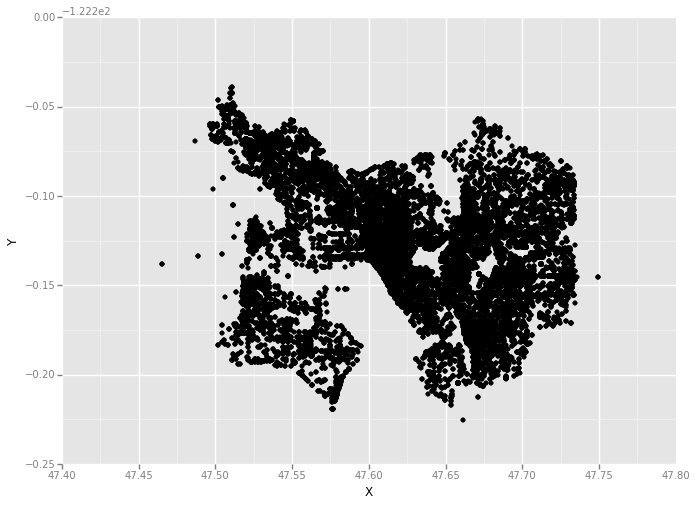

<ggplot: (37029184)>

In [260]:
ggplot(aes(x='X', y='Y'), data=seatleData) + \
    geom_point()

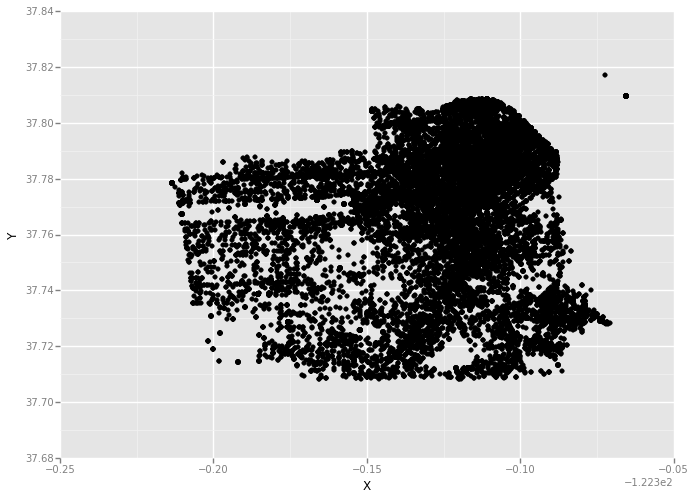

<ggplot: (41708969)>

In [261]:
ggplot(aes(x='X', y='Y'), data=sfData) + \
    geom_point()

### Analysis
We can both the two cities seems to have the __same number of crimes__ referenced _(around 30 000)_.

The repartition is __homogeneous__. There some more quiet zones in both cities.

# Focus our analysis on drugs and narcotics

Our goals is to focus our analysis on one specific type of crime: __Drugs and Narcotics__.

We'll talk both about sells and usages of drugs and narcotics in the two cities. 
We could ask some questions to solve:
* Is there the same number of Drugs and Narcotic crimes in the two cities during the summer 2014?
* Is exist a place where crimes are the most reprented?
* Is there any association between time and crimes?
* This kind of crime happened during all the summer?
* When did people sell drugs and when did they use it?
* What are the most popular drugs in the two cities? Are they similars?


In [294]:
sfDrugs = sf[(sf.Category.str.contains('NARC'))]
seatleDrugs = seatle[((seatle['Offense Type'].str.contains('NARC')) | (seatle['Offense Type'].str.contains('DRUG')))]

In [295]:
# Map of 'offense type' field of Seatle to a common crime mapping between San Francisco and Seatle
seatleTypes = {
    'NARC-SELL-HEROIN': 'SELL-HEROIN',
    'NARC-FOUND-OTHER': 'FOUND-OTHER',
    'NARC-POSSESS-HALLUCINOGEN': 'POSSESSION-HALLUCINOGEN',
    'NARC-POSSESS-METH': 'POSSESSION-METH',
    'NARC-FOUND-MARIJU': 'FOUND-MARIJUANA',
    'NARC-POSSESS-COCAINE': 'POSSESSION-COCAINE',
    'NARC-EQUIPMENT/PARAPHENALIA': 'POSSESSION-PARAPHENALIA',
    'NARC-POSSESS-AMPHETAMINE': 'POSSESSION-AMPHETAMINE',
    'NARC-POSSESS-HEROIN': 'POSSESSION-HEROIN',
    'NARC-SELL-COCAINE': 'SELL-COCAINE',
    'NARC-FOUND-AMPHETAMINE': 'FOUND-AMPHETAMINE',
    'NARC-FOUND-HEROIN': 'FOUND-HEROIN',
    'NARC-POSSESS-OTHER': 'POSSESSION-OTHER',
    'NARC-SELL-METH': 'SELL-METH',
    'NARC-FOUND-SYNTHETIC': 'FOUND-SYNTHETIC',
    'NARC-POSSESS-MARIJU': 'POSSESSION-MARIJUANA',
    'NARC-FOUND-COCAINE': 'FOUND-COCAINE',
    'DUI-DRUGS': 'DUI',
    'NARC-FORGERY-PRESCRIPTION': 'PRESCRIPTION',
    'NARC-SELL-AMPHETAMINE': 'SELL-AMPHETAMINE',
    'NARC-DRUG TRAFFIC LOITERING': 'LOITERING',
    'NARC-FOUND-OPIUM': 'FOUND-OPIUM',
    'NARC-POSSESS-PILL/TABLET': 'POSSESSION-PILL',
    'NARC-FOUND-METH': 'FOUND-METH',
    'NARC-FRAUD-PRESCRIPTION': 'PRESCRIPTION',
    'NARC-SMUGGLE-OTHER': 'SELL-OTHER',
    'NARC-SELL-SYNTHETIC': 'SELL-SYNTHETIC',
    'NARC-SELL-MARIJU': 'SELL-MARIJU',
    'NARC-PRODUCE-MARIJU': 'PRODUCTION'
}

# Map of 'Descript' field of San Francisco to a common crime mapping between San Francisco and Seatle
sfTypes = {
    'POSSESSION OF MARIJUANA': 'POSSESSION-MARIJUANA',
    'POSSESSION OF CONTROLLED SUBSTANCE FOR SALE': 'SELL-OTHER',
    'POSSESSION OF METH-AMPHETAMINE FOR SALE': 'SELL-METH',
    'POSSESSION OF HEROIN FOR SALES': 'SELL-HEROIN',
    'POSSESSION OF METH-AMPHETAMINE': 'POSSESSION-METH',
    'POSSESSION OF COCAINE': 'POSSESSION-COCAINE',
    'POSSESSION OF NARCOTICS PARAPHERNALIA': 'POSSESSION-PARAPHENALIA',
    'POSSESSION OF CONTROLLED SUBSTANCE': 'POSSESSION-OTHER',
    'POSSESSION OF METHADONE': 'POSSESSION-METHADONE',
    'POSSESSION OF MARIJUANA FOR SALES': 'SELL-MARIJUANA',
    'SALE OF MARIJUANA': 'SELL-MARIJUANA',
    'POSSESSION OF BASE/ROCK COCAINE': 'POSSESSION-COCAINE',
    'TRANSPORTATION OF METH-AMPHETAMINE': 'SELL-METH',
    'POSSESSION OF HEROIN': 'POSSESSION-HEROIN',
    'POSSESSION OF BASE/ROCK COCAINE FOR SALE': 'SELL-COCAINE',
    'SALE OF BASE/ROCK COCAINE': 'SELL-COCAINE',
    'POSSESSION OF HALLUCINOGENIC FOR SALES': 'SELL-HALLUCINOGEN',
    'SALE OF HEROIN': 'SELL-HEROIN',
    'SALE OF CONTROLLED SUBSTANCE': 'SELL-OTHER',
    'SALE OF METH-AMPHETAMINE': 'SELL-METH',
    'POSSESSION OF OPIATES': 'POSSESSION-OPIATES',
    'POSSESSION OF COCAINE FOR SALES': 'SELL-COCAINE',
    'UNDER INFLUENCE OF DRUGS IN A PUBLIC PLACE': 'DUI',
    'PLANTING/CULTIVATING MARIJUANA': 'PRODUCTION',
    'MAINTAINING PREMISE WHERE NARCOTICS ARE SOLD/USED': 'SELL-OTHER',
    'LOITERING WHERE NARCOTICS ARE SOLD/USED': 'LOITERING',
    'TRANSPORTAION OF CONTROLLED SUBSTANCE': 'SELL-OTHER',
    'POSSESSION OF AMPHETAMINE FOR SALES': 'SELL-AMPHETAMINE',
    'POSSESSION OF HALLUCINOGENIC': 'POSSESSION-HALLUCINOGENIC',
    'SALE OF OPIATES': 'SELL-OPIATES',
    'POSSESSION OF OPIUM DERIVATIVE': 'POSSESSION-OPIUM',
    'POSSESSION OF METHADONE FOR SALES': 'SELL-METHADONE',
    'FORGE OR ALTER PRESCRIPTION': 'PRESCRIPTION',
    'UNDER THE INFLUENCE OF CONTROLLED SUBSTANCES': 'DUI',
    'TRANSPORTATION OF COCAINE': 'SELL-COCAINE',
    'SALE OF COCAINE': 'SELL-COCAINE',
    'POSSESSION OF OPIATES FOR SALES': 'SELL-OPIATES',
    'TRANSPORTATION OF MARIJUANA': 'SELL-MARIJUANA',
    'SALE OF BARBITUATES': 'SELL-BARBITUATES',
    'TRANSPORTATION OF HEROIN': 'SELL-HEROIN',
    'FAILURE TO REGISTER AS NARCOTICS ADDICT': 'OTHER'
}

In [296]:
seatleDrugs = pd.DataFrame({
        'Type': seatleDrugs['Offense Type'].replace(seatleTypes),
        'Day': pd.to_datetime(seatleDrugs['Occurred Date or Date Range Start']).dt.day,
        'WeekOfYear': pd.to_datetime(seatleDrugs['Occurred Date or Date Range Start']).dt.weekofyear,
        'Hour': pd.to_datetime(seatleDrugs['Occurred Date or Date Range Start']).dt.hour,
        'X': seatleDrugs.Latitude,
        'Y': seatleDrugs.Longitude
    })

In [297]:
sfDrugs = pd.DataFrame({
        'Type': sfDrugs['Descript'].replace(sfTypes),
        'Day': pd.to_datetime(sfDrugs['Date']).dt.day,
        'WeekOfYear': pd.to_datetime(sfDrugs['Date']).dt.weekofyear,
        'Hour': np.floor(sfDrugs['Time'].str.replace(':', '.').astype('float')),
        'X': sfDrugs.X,
        'Y': sfDrugs.Y
    })

In [298]:
print 'Seatle counts:'
print seatleDrugs.count()
print '\n'
print 'San Francisco counts:'
print sfDrugs.count()

Seatle counts:
Day           373
Hour          373
Type          373
WeekOfYear    373
X             373
Y             373
dtype: int64


San Francisco counts:
Day           1345
Hour          1345
Type          1345
WeekOfYear    1345
X             1345
Y             1345
dtype: int64


In [321]:
# We classify crimes in main categories
def get_actions(data):
    data['Action'] = 'OTHER'
    data.ix[data.Type.str.contains('SELL'), 'Action'] = 'SELL'
    data.ix[data.Type.str.contains('POSSESSION'), 'Action'] = 'POSSESSION'
    data.ix[data.Type.str.contains('FOUND'), 'Action'] = 'POSSESSION'
    data.ix[data.Type.str.contains('PRODUCTION'), 'Action'] = 'SELL'
    return data
    
seatleData = get_actions(seatleDrugs)
sfData = get_actions(sfDrugs)

## Sells and usages analysis
Looking at the crime counts for the two cities, we can clearly say that for the same initial number of crimes in the two cities, __San Francisco has 4 times more Drugs and Narcotic crimes than Seatle__.




### Let's have a look on location

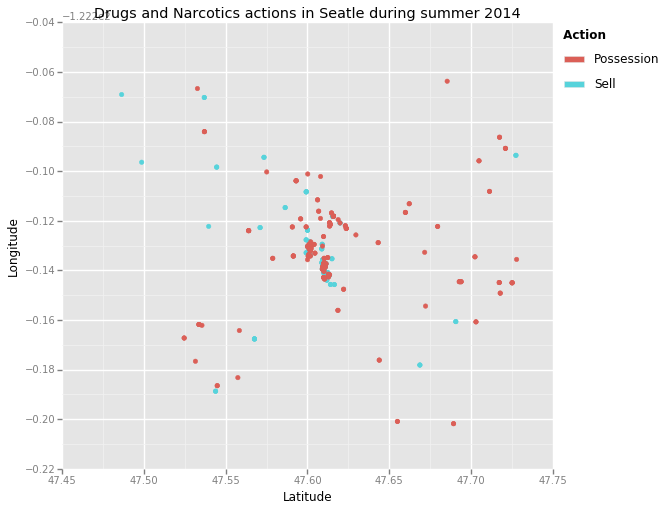

<ggplot: (44244659)>

In [327]:
ggplot(aes(x='X', y='Y', color='Action'), data=seatleData[(seatleData.Action != 'OTHER')]) + \
    geom_point() +\
    scale_color_gradient() + \
    xlab("Latitude") +\
    ylab("Longitude") +\
    ggtitle("Drugs and Narcotics actions in Seatle during summer 2014")

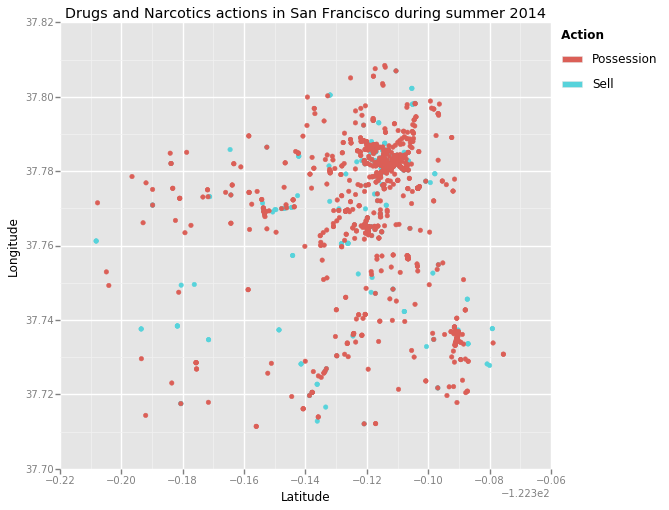

<ggplot: (40472089)>

In [326]:
ggplot(aes(x='X', y='Y', color='Action'), data=sfData[(sfData.Action != 'OTHER')]) + \
    geom_point() +\
    scale_color_gradient() + \
    xlab("Latitude") +\
    ylab("Longitude") +\
    ggtitle("Drugs and Narcotics actions in San Francisco during summer 2014")

#### Convergent point detected
As we can see on the two plots above, there is clearly a main __convergent point of drugs and narcotics distributions__ in the cities.

_We can also identify a lot of extra positions in San Francisco. That could be explain by a larger selling network than in Seatle. An other answer could be that policemen are more efficient or more present in the city of San Francisco than in Seatle, for this kind of crime. _

__What about DEA? https://en.wikipedia.org/wiki/Drug_Enforcement_Administration
Is it more efficient in SF than in Seatle?__

### What about timing?

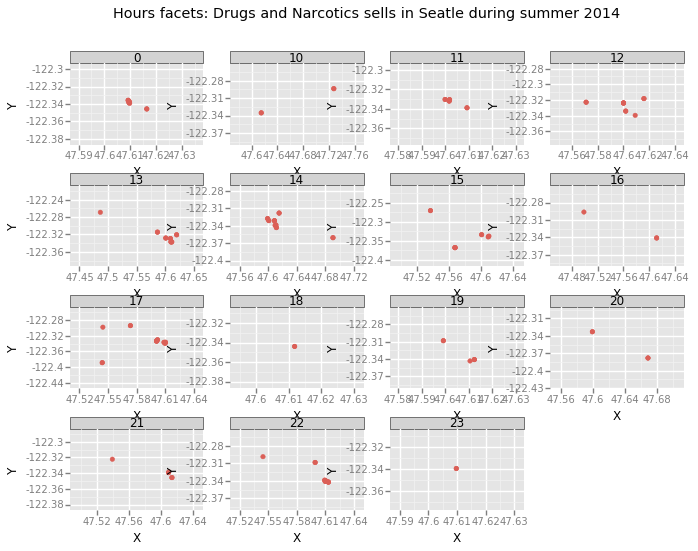

<ggplot: (47071881)>

In [338]:
ggplot(aes(x='X', y='Y', color='Action'), data=seatleData[(seatleData.Action == 'SELL')]) + \
    geom_point() +\
    scale_color_gradient() +\
    facet_wrap('Hour') + \
    ggtitle("Hours facets: Drugs and Narcotics sells in Seatle during summer 2014")

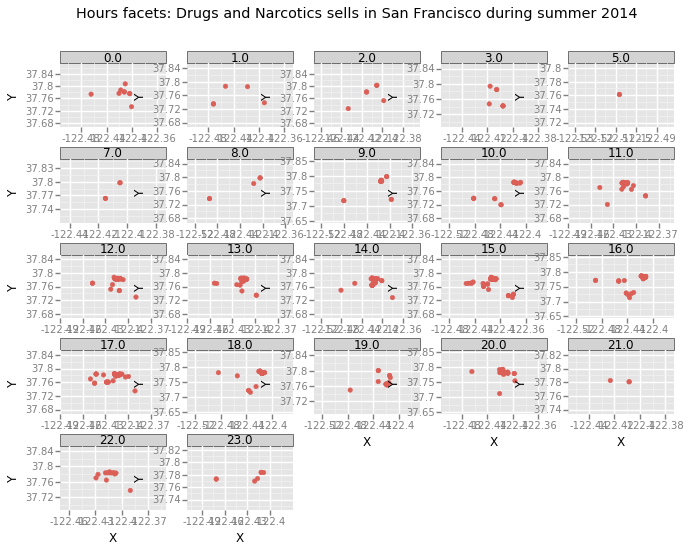

<ggplot: (49680721)>

In [339]:
ggplot(aes(x='X', y='Y', color='Action'), data=sfData[(sfData.Action == 'SELL')]) + \
    geom_point() +\
    scale_color_gradient() +\
    facet_wrap('Hour') + \
    ggtitle("Hours facets: Drugs and Narcotics sells in San Francisco during summer 2014")

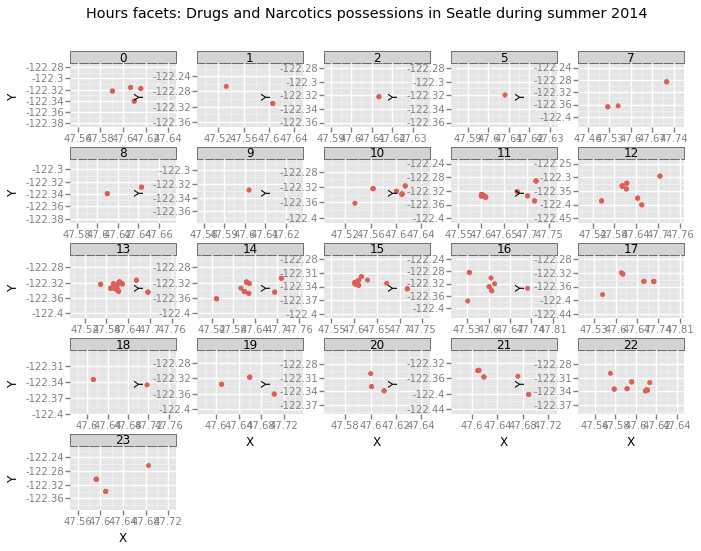

<ggplot: (51880964)>

In [340]:
ggplot(aes(x='X', y='Y', color='Action'), data=seatleData[(seatleData.Action == 'POSSESSION')]) + \
    geom_point() +\
    scale_color_gradient() +\
    facet_wrap('Hour') + \
    ggtitle("Hours facets: Drugs and Narcotics possessions in Seatle during summer 2014")

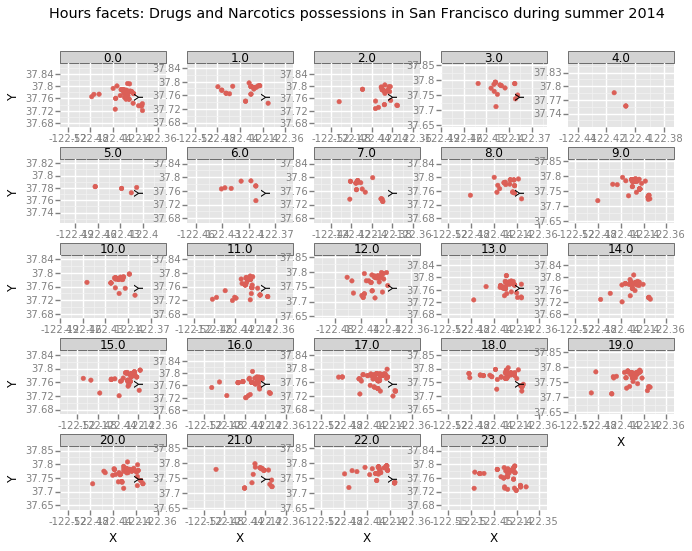

<ggplot: (50448753)>

In [341]:
ggplot(aes(x='X', y='Y', color='Action'), data=sfData[(sfData.Action == 'POSSESSION')]) + \
    geom_point() +\
    scale_color_gradient() +\
    facet_wrap('Hour') + \
    ggtitle("Hours facets: Drugs and Narcotics possessions in San Francisco during summer 2014")

#### That clearly move
As you can see on the four plots above, the first two ones for sells and the two others for possessions, things moved during the day.

##### Sells
* In Seatle, you can clearly identify two places where people sold at 1pm and 2pm.
* In San Francisco, business starts at 11am and continue during the afternoon until 20pm.

##### Possessions
* In Seatle, possessions of drugs and narcotics are clearly in the same time range than sells. Between 12pm and 4pm.
* In San Francisco, you've spikes at the same time range than sellss, but, you can also observe a large continious usage of drugs and narcotics during all day and night.


### Confirm our observations
We can easily conclude that possessions and sells are higly correlated.

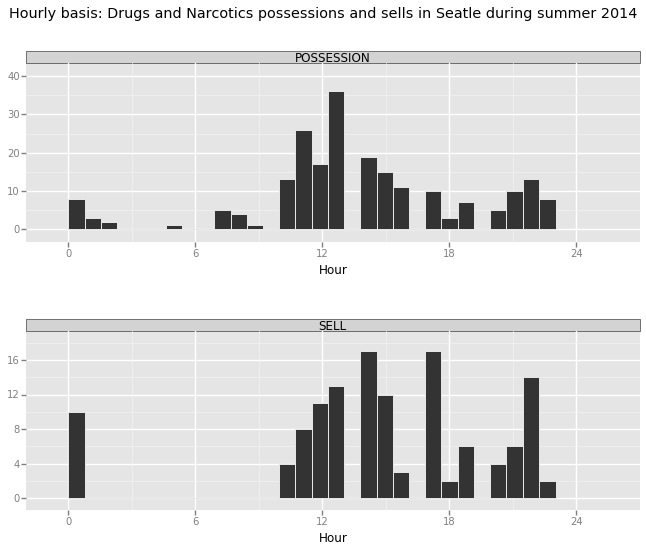

<ggplot: (44367357)>

In [346]:
ggplot(aes(x='Hour'), data=seatleData[(seatleData.Action == 'SELL') | (seatleData.Action == 'POSSESSION')]) + \
    geom_histogram() +\
    facet_wrap('Action') + \
    ggtitle("Hourly basis: Drugs and Narcotics possessions and sells in Seatle during summer 2014")

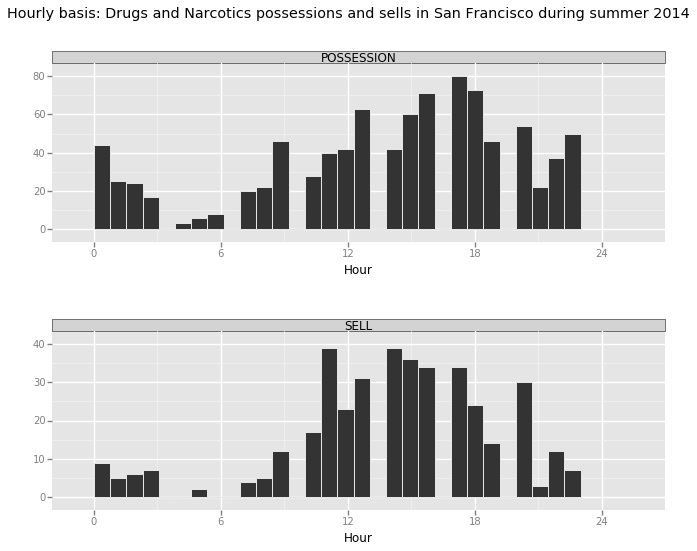

<ggplot: (36927103)>

In [347]:
ggplot(aes(x='Hour'), data=sfData[(sfData.Action == 'SELL') | (sfData.Action == 'POSSESSION')]) + \
    geom_histogram() +\
    facet_wrap('Action') + \
    ggtitle("Hourly basis: Drugs and Narcotics possessions and sells in San Francisco during summer 2014")

### Weekly analysis
Let's have a look on event on a weekly basis

#### Weeks reminder

* Week 23	June 2, 2014	June 8, 2014
* Week 24	June 9, 2014	June 15, 2014
* Week 25	June 16, 2014	June 22, 2014
* Week 26	June 23, 2014	June 29, 2014
* Week 27	June 30, 2014	July 6, 2014
* Week 28	July 7, 2014	July 13, 2014
* Week 29	July 14, 2014	July 20, 2014
* Week 30	July 21, 2014	July 27, 2014
* Week 31	July 28, 2014	August 3, 2014
* Week 32	August 4, 2014	August 10, 2014
* Week 33	August 11, 2014	August 17, 2014
* Week 34	August 18, 2014	August 24, 2014
* Week 35	August 25, 2014	August 31, 2014

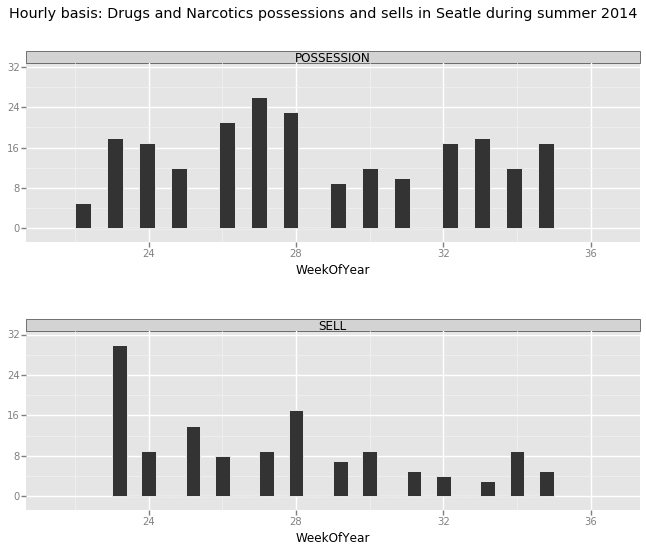

<ggplot: (51865197)>

In [348]:
ggplot(aes(x='WeekOfYear'), data=seatleData[(seatleData.Action == 'SELL') | (seatleData.Action == 'POSSESSION')]) + \
    geom_histogram() +\
    facet_wrap('Action') + \
    ggtitle("Hourly basis: Drugs and Narcotics possessions and sells in Seatle during summer 2014")

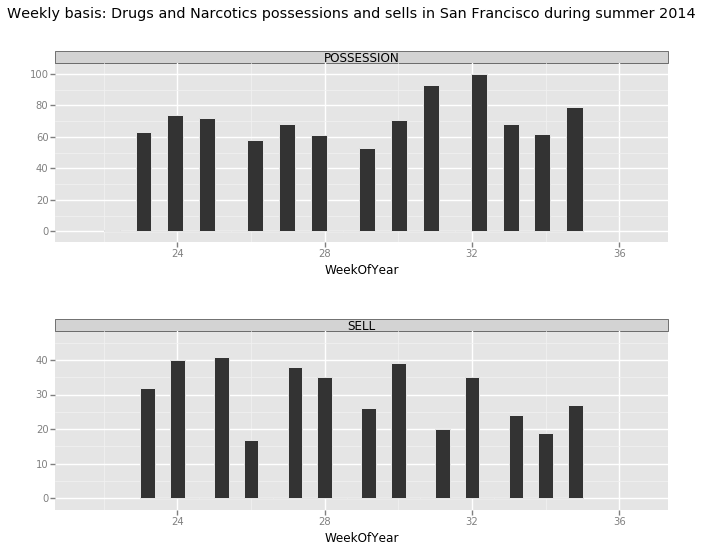

<ggplot: (51377458)>

In [349]:
ggplot(aes(x='WeekOfYear'), data=sfData[(sfData.Action == 'SELL') | (sfData.Action == 'POSSESSION')]) + \
    geom_histogram() +\
    facet_wrap('Action') + \
    ggtitle("Weekly basis: Drugs and Narcotics possessions and sells in San Francisco during summer 2014")

### Results

* We can say that cunsumers disapears at the first of July in Seatle. __May people go elsewhere for holidays?__
* In San Francisco, that never go down. In fact you can observe an increase of possessions of drugs and narcotics the last two weeks of July and the first week of August. __San Francisco is an attractive city for holidays.__

### Most popular drugs

In [205]:
print seatleData.Type.count()
print seatleData.Type.value_counts().head(10)

373
SELL-COCAINE               77
POSSESSION-COCAINE         41
POSSESSION-PARAPHENALIA    30
FOUND-OTHER                23
POSSESSION-HEROIN          23
FOUND-MARIJUANA            22
POSSESSION-METH            19
SELL-METH                  18
SELL-HEROIN                15
PRESCRIPTION               13
Name: Type, dtype: int64


In [206]:
print sfData.Type.count()
print sfData.Type.value_counts().head(10)

1345
POSSESSION-PARAPHENALIA    254
POSSESSION-METH            215
POSSESSION-MARIJUANA       186
SELL-COCAINE               135
POSSESSION-COCAINE         112
POSSESSION-HEROIN           77
SELL-MARIJUANA              75
SELL-METH                   72
SELL-OTHER                  61
POSSESSION-OTHER            59
Name: Type, dtype: int64


## Results

San Francisco is a more attractive city during the summer. Drugs and Narcotic business is higher. That's certainly one reason that could explain why there are more drugs and narcotics crimes in San Francisco than inSeatle during this summer 2014.

Drugs are quite the same in the two cities. We find cocaine, paraphenalia, marijuana, heroin and meth as main drugs.

We finnaly found some pieces of answers to all the questions asked at the begining of this document.
* Is there the same number of Drugs and Narcotic crimes in the two cities during the summer 2014?
* Is exist a place where crimes are the most reprented?
* Is there any association between time and crimes?
* This kind of crime happened during all the summer?
* When did people sell drugs and when did they use it?
* What are the most popular drugs in the two cities? Are they similars?

_Thanks for reading and lets some comments if you've any questions or additions to propose to this analysis._

